# SMOTE "Synthetic Minority Over Sampling Technique"


IMBALANCED DATA-SET:

    We can say Data Set to be imbalanced when we see that Target variable is having imbalanced dada. We have two category data A and B, we found A to be more and B to be less when we compare.
    
    "WE CAN CONTROL THIS BY SMOTE(Synthetic Minority Over Sampling Technique) TECHINQIE"

------------------------------------------

What does a Smote Work?

Smote create Synthetic rows of the minority class By making the minority class to majority class.

It checks for the minority class in the dataset and then from minority neighbours they generate random data to over come the gaps.

### NUMPY, SKLEARN higher version required to work with smote


In [1]:
# checkin the version of sklearn

import sklearn
sklearn.__version__

'1.1.1'

In [2]:
# checking version of numpy

import numpy
numpy.__version__

'1.21.5'

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression # its because target variable binary 0,1

import warnings
warnings.filterwarnings("ignore")

In [4]:
ds=pd.read_csv("diabetes.csv")

In [5]:
ds.shape

(768, 9)

In [6]:
ds.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df=pd.DataFrame(data=ds)

In [8]:
x=df.iloc[:,0:-1]

In [9]:
y=df.iloc[:,-1]

In [10]:
x.shape

(768, 8)

In [11]:
y.shape

(768,)

In [12]:
y.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<AxesSubplot:xlabel='Outcome', ylabel='count'>

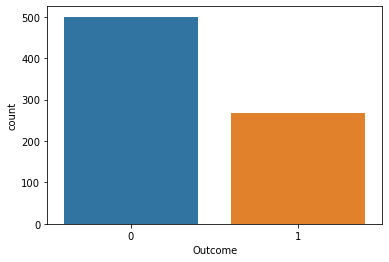

In [13]:
sns.countplot(df['Outcome'])

### SMOTE TECHNIQUE

In [14]:
from imblearn.over_sampling import SMOTE #calling smote

In [15]:
smt=SMOTE() # instance ready

In [16]:
trainx,trainy=smt.fit_resample(x,y) #will make the data smaple

In [17]:
trainx.value_counts()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI        DiabetesPedigreeFunction  Age
0            57       60             0              0        21.700000  0.735000                  67     1
5            146      74             34             0        34.891527  0.607759                  46     1
             124      74             0              0        34.000000  0.220000                  38     1
             126      78             27             22       29.600000  0.439000                  40     1
             128      80             0              0        34.600000  0.144000                  45     1
                                                                                                        ..
2            101      58             17             265      24.200000  0.614000                  23     1
                                     35             90       21.800000  0.155000                  22     1
             102      86             36   

In [18]:
trainy.value_counts()

1    500
0    500
Name: Outcome, dtype: int64

In [19]:
trainy

0      1
1      0
2      1
3      0
4      1
      ..
995    1
996    1
997    1
998    1
999    1
Name: Outcome, Length: 1000, dtype: int64

<AxesSubplot:xlabel='Outcome', ylabel='count'>

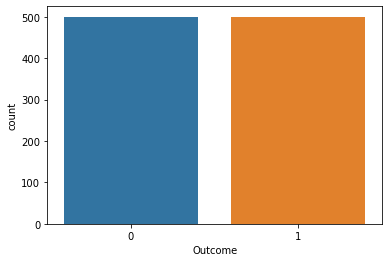

In [20]:
sns.countplot(trainy)

# " Data-Set is now balanced"

In [21]:
from sklearn.model_selection import train_test_split

In [73]:
train_x,test_x,train_y,test_y= train_test_split(trainx,trainy,test_size=.30,random_state=42)

In [74]:
train_x.shape

(700, 8)

In [75]:
train_y.shape

(700,)

In [76]:
test_y.shape

(300,)

In [77]:
test_x.shape

(300, 8)

# Logistic Regression

In [78]:
from sklearn.linear_model import LogisticRegression

In [81]:
lg=LogisticRegression()
lg.fit(train_x,train_y)
pred_y=lg.predict(test_x)
print(lg.score(test_x,test_y))

0.7633333333333333


In [83]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

print(accuracy_score(pred_y,test_y))
print(confusion_matrix(pred_y,test_y))
print(classification_report(pred_y,test_y))

0.7633333333333333
[[112  34]
 [ 37 117]]
              precision    recall  f1-score   support

           0       0.75      0.77      0.76       146
           1       0.77      0.76      0.77       154

    accuracy                           0.76       300
   macro avg       0.76      0.76      0.76       300
weighted avg       0.76      0.76      0.76       300



In [85]:
import sklearn
from sklearn.datasets import load_iris

In [86]:
ds=load_iris()

In [87]:
ds

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [91]:
ds.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [93]:
df=pd.DataFrame(data=ds.data,columns=ds.feature_names)

In [94]:
df.sample

<bound method NDFrame.sample of      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]>

In [95]:
df['Target']=pd.DataFrame(data=ds.target)

In [96]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


<AxesSubplot:xlabel='Target', ylabel='count'>

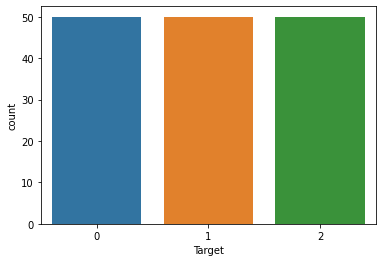

In [98]:
sns.countplot(df['Target'])

# Well Balanced Data SET

In [102]:
wine=pd.read_csv("winequality-red.csv")

In [103]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [106]:
wine['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

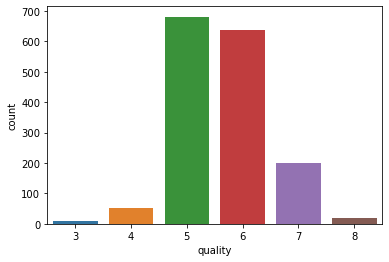

In [107]:
sns.countplot(wine['quality']) 

# max count of medium quality wine. where as high and low quality wine is very less

###  Totally unbalanced DATA-SET

In [108]:
x=wine.iloc[:,0:-1]

In [109]:
y=wine.iloc[:,-1]

In [111]:
# calling imblearn library.

from imblearn.over_sampling import SMOTE

In [113]:
sm=SMOTE()
xtrain,ytrain=sm.fit_resample(x,y)

In [114]:
xtrain.value_counts()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  density   pH        sulphates  alcohol  
10.700000      0.350000          0.530000     2.600000        0.070000   5.000000             16.000000             0.997200  3.150000  0.650000   11.000000    17
7.200000       0.360000          0.460000     2.100000        0.074000   24.000000            44.000000             0.995340  3.400000  0.850000   11.000000     8
8.900000       0.120000          0.450000     1.800000        0.075000   10.000000            21.000000             0.995520  3.410000  0.760000   11.900000     6
6.800000       0.590000          0.060000     6.000000        0.060000   11.000000            18.000000             0.996200  3.410000  0.590000   10.800000     6
11.100000      0.310000          0.530000     2.200000        0.060000   3.000000             10.000000             0.995720  3.020000  0.830000   10.900000     5
                            

In [115]:
ytrain.value_counts()

5    681
6    681
7    681
4    681
8    681
3    681
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

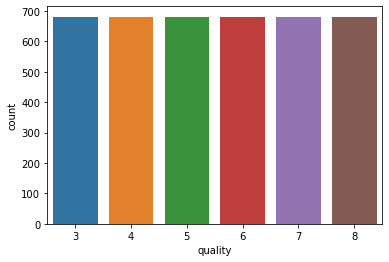

In [116]:
sns.countplot(ytrain)

# "Hooray we increased the count"

In [117]:
from sklearn.model_selection import train_test_split

In [118]:
x_train,x_test,y_train,y_test=train_test_split(xtrain,ytrain,test_size=.30,random_state=45)

In [119]:
x_train.shape

(2860, 11)

In [120]:
x_test.shape

(1226, 11)

In [121]:
y_train.shape

(2860,)

In [123]:
y_test.shape

(1226,)

In [124]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [127]:
knn=KNeighborsClassifier()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier()
svc=SVC()

model=[knn,mnb,dtc,svc]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    pred_y=m.predict(x_test)
    
    print("\n Score :",m," ",m.score(x_train,y_train))
    print("Accuracy_score",accuracy_score(pred_y,y_test),"\n")
    print("\n",confusion_matrix(pred_y,y_test),"\n")
    print("\n",classification_report(pred_y,y_test),"\n \n")


 Score : KNeighborsClassifier()   0.7797202797202797
Accuracy_score 0.6982055464926591 


 [[198  10  16  10   6   0]
 [ 14 177  40  32   7   3]
 [  4   7  96  52   7   3]
 [  4   1  33  59  17   6]
 [  0   0   7  36 151  17]
 [  0   1   7  18  12 175]] 


               precision    recall  f1-score   support

           3       0.90      0.82      0.86       240
           4       0.90      0.65      0.75       273
           5       0.48      0.57      0.52       169
           6       0.29      0.49      0.36       120
           7       0.76      0.72      0.73       211
           8       0.86      0.82      0.84       213

    accuracy                           0.70      1226
   macro avg       0.70      0.68      0.68      1226
weighted avg       0.75      0.70      0.72      1226
 
 


 Score : MultinomialNB()   0.2636363636363636
Accuracy_score 0.2707993474714519 


 [[152  94  51  58  79 110]
 [ 11   9  23  16   7   1]
 [ 10  39  95  43  22  28]
 [ 37  29  16  40  44  26]
 